<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


In [3]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
import matplotlib.pyplot as plt

# keypoints using mediapipe holistic:

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image,model):
  results = model.process(image)
  return image, results

In [6]:
def draw_landmarks(img,results):
  mp_drawing.draw_landmarks(img, 
                            results.face_landmarks,
                            mp_holistic.FACEMESH_TESSELATION,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.right_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 55), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.left_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 55, 200), thickness=1, circle_radius=1))

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
      ret, frame = cap.read()
      # recolor feed
      
      # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # make detections
      frame, results = mediapipe_detection(frame,holistic)
      # print(results.face_landmarks)  
    
      # recoloring image back to BGR for rendering
      # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      
      #face detetction
      draw_landmarks(frame,results)
      
      cv2.imshow('Webcam Feed', frame)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

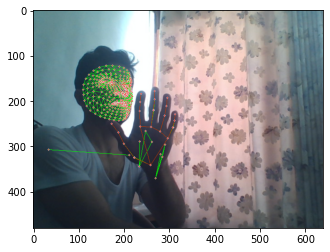

In [ ]:
plt.imshow(img)

In [ ]:
type(results.left_hand_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
results.face_landmarks

landmark {
  x: 0.3102911710739136
  y: 0.41362476348876953
  z: -0.02882600575685501
}
landmark {
  x: 0.3185250759124756
  y: 0.3768572509288788
  z: -0.03372460976243019
}
landmark {
  x: 0.30902931094169617
  y: 0.39233317971229553
  z: -0.022377992048859596
}
landmark {
  x: 0.3055265545845032
  y: 0.349050909280777
  z: -0.021467966958880424
}
landmark {
  x: 0.3190958499908447
  y: 0.36664077639579773
  z: -0.03357819840312004
}
landmark {
  x: 0.3158351182937622
  y: 0.35609838366508484
  z: -0.028025547042489052
}
landmark {
  x: 0.30493873357772827
  y: 0.3330010175704956
  z: -0.002697339514270425
}
landmark {
  x: 0.24063126742839813
  y: 0.33113324642181396
  z: -0.005734341684728861
}
landmark {
  x: 0.30145904421806335
  y: 0.31359270215034485
  z: 0.008274116553366184
}
landmark {
  x: 0.3018359839916229
  y: 0.300997793674469
  z: 0.011333256959915161
}
landmark {
  x: 0.2970207631587982
  y: 0.2599239945411682
  z: 0.032861631363630295
}
landmark {
  x: 0.309986501932

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
len(results.face_landmarks.landmark)

468

In [ ]:
468*3

1404

In [ ]:
results.face_landmarks.landmark

[x: 0.3102911710739136
y: 0.41362476348876953
z: -0.02882600575685501
, x: 0.3185250759124756
y: 0.3768572509288788
z: -0.03372460976243019
, x: 0.30902931094169617
y: 0.39233317971229553
z: -0.022377992048859596
, x: 0.3055265545845032
y: 0.349050909280777
z: -0.021467966958880424
, x: 0.3190958499908447
y: 0.36664077639579773
z: -0.03357819840312004
, x: 0.3158351182937622
y: 0.35609838366508484
z: -0.028025547042489052
, x: 0.30493873357772827
y: 0.3330010175704956
z: -0.002697339514270425
, x: 0.24063126742839813
y: 0.33113324642181396
z: -0.005734341684728861
, x: 0.30145904421806335
y: 0.31359270215034485
z: 0.008274116553366184
, x: 0.3018359839916229
y: 0.300997793674469
z: 0.011333256959915161
, x: 0.2970207631587982
y: 0.2599239945411682
z: 0.032861631363630295
, x: 0.30998650193214417
y: 0.41852277517318726
z: -0.029050856828689575
, x: 0.30868256092071533
y: 0.42348939180374146
z: -0.02761734090745449
, x: 0.30677899718284607
y: 0.4266800582408905
z: -0.025539159774780273
,

In [ ]:
np.array([[r.x,r.y,r.z,r.visibility] for r in results.right_hand_landmarks.landmark]).flatten() \
if results.right_hand_landmarks else np.zeros(33*4)

array([ 4.04964387e-01,  7.12233245e-01,  3.10494073e-07,  0.00000000e+00,
        3.49862993e-01,  6.77053988e-01, -2.31654756e-02,  0.00000000e+00,
        3.13715011e-01,  6.14168286e-01, -3.66608724e-02,  0.00000000e+00,
        2.93872476e-01,  5.60639620e-01, -4.76699360e-02,  0.00000000e+00,
        2.70337433e-01,  5.21502495e-01, -5.89609072e-02,  0.00000000e+00,
        3.68976712e-01,  5.35251260e-01, -2.86652278e-02,  0.00000000e+00,
        3.67735982e-01,  4.63728994e-01, -4.78107817e-02,  0.00000000e+00,
        3.70008260e-01,  4.21046257e-01, -6.27593771e-02,  0.00000000e+00,
        3.73117089e-01,  3.84669185e-01, -7.39485472e-02,  0.00000000e+00,
        4.07049328e-01,  5.37127852e-01, -3.15783024e-02,  0.00000000e+00,
        4.15626198e-01,  4.58976924e-01, -4.79423553e-02,  0.00000000e+00,
        4.19054270e-01,  4.10326749e-01, -6.11498840e-02,  0.00000000e+00,
        4.20228690e-01,  3.71102989e-01, -7.13261589e-02,  0.00000000e+00,
        4.38412040e-01,  

In [7]:
def extract_keypoints(results):
    pose = np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[r.x,r.y,r.z] for r in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    right_hand = np.array([[r.x,r.y,r.z] for r in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    left_hand = np.array([[r.x,r.y,r.z] for r in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,right_hand,left_hand])

In [ ]:
extract_keypoints(results)

NameError: name 'results' is not defined

# setup folders for collection:

In [11]:
data_path = os.path.join('action_data')
actions = np.array(['Hi','thank you','iloveyou'])
no_videos = 30
sequences_length = 30

In [11]:
for action in actions:
    for video in range(no_videos):
        try:
            os.makedirs(os.path.join(data_path,action,str(video)))  
        except:
            pass        

# collecting keypoint values for train and test

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for video in range(no_videos):
            for frame_num in range(sequences_length):
                
                ret, frame = cap.read()
                # recolor feed

                # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # make detections
                image, results = mediapipe_detection(frame,holistic)
                # print(results.face_landmarks)  

                # recoloring image back to BGR for rendering
                # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                #face detetction
                draw_landmarks(image,results)

                if frame_num==0:
                    cv2.putText(image,'COLLECTION START',(150,200),
                                cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                    cv2.putText(image,f'collecting frames for {action} video numer {video}',(15,12),
                                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    cv2.imshow('Webcam Feed', image)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image,f'collecting frames for {action} video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    
                    cv2.imshow('Webcam Feed', image)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path,action,str(video),str(frame_num))
                np.save(npy_path,keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()

# preprocess data and create labels and features:

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
action_path='/content/drive/MyDrive/Colab Notebooks/Computer Vision/action_data'
os.path.join(action_path,'thank you')

'/content/drive/MyDrive/Colab Notebooks/Computer Vision/action_data/thank you'

In [12]:
actions

array(['Hi', 'thank you', 'iloveyou'], dtype='<U9')

In [13]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Hi': 0, 'iloveyou': 2, 'thank you': 1}

In [14]:

sequences = []
labels = []
actions
for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(action_path,action,str(video),f'{frame_num}.npy'))
      window.append(res)
    sequences.append(window)
    labels.append(label_map[action])


In [15]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [16]:
X = np.array(sequences)
y = np.array(labels)

In [17]:
X.shape

(90, 30, 1662)

In [18]:
y.shape

(90,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [20]:
X_train.shape

(81, 30, 1662)